In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [73]:
house = pd.read_csv('house_ratio.csv')
house

Unnamed: 0  취업인원수  성별  연령        가중값  학력  수학구분    총소비지출액      의류신발  \
0             21      1   1  27  4077.6427   6     1   1399222  0.064427   
1             35      1   2  24  2891.8853   5     1    958911  0.245174   
2             36      1   1  29  2188.4222   6     1   1468274  0.036024   
3             41      0   2  28  4238.2221   5     1   1127203  0.113733   
4             49      0   2  25  2141.1468   6     1    495179  0.067798   
5             69      1   1  27  3367.4595   6     1   2020540  0.082975   
6             71      1   2  29  4130.1789   6     1   1558596  0.151210   
7            179      1   1  25   789.0150   6     1   2301126  0.004346   
8            183      1   2  27  2720.0087   5     1   1388844  0.203011   
9            224      1   2  24  1518.2135   6     1   1955929  0.100234   
10           226      0   2  26   744.6782   8     2   1026880  0.005843   
11           230      1   2  26  2251.0350   6     1   2762818  0.101834   
12           253      1   2  28  4277.9977   7     1   2500446  0.074430   
13           271      1   1  27  2914.1572   6     1   1317424  0.041591   
14           273      0   1  29  2914.1572   5     1   1207485  0.091720   
15           280      1   2  22  1431.1550   5     1   2701499  0.023267   
16           307      1   1  27  4370.7811   4     4   2762767  0.018622   
17           312      0   2  28  3554.5334   6     1   1290140  0.094345   
18           313      1   2  25   696.5615   6     1   1610356  0.146693   
19           314      1   2  23  4251.0949   6     5   1866385  0.064004   
20           315      1   2  27  4147.7565   8     2   1260050  0.029100   
21           317      1   2  26  4147.7565   6     1   1126963  0.106155   
22           321      1   2  27  2076.9278   6     1   1333984  0.000900   
23           349      1   1  26  4221.5704   6     1   1676439  0.014364   
24           350      1   1  25  4221.5704   7     1   1007868  0.049411   
25           353      1   2  29  2113.8890   7     1   1878007  0.031833   
26           357      1   1  25   714.2183   6     1   1305560  0.000000   
27           373      1   2  28  4972.0970   7     2   3124535  0.070656   
28           374      1   1  28  1721.7880   6     1   7073112  0.049257   
29           391      0   1  27   789.0150   6     1    804324  0.003730   
30           408      0   2  27  3193.4775   6     1   1290118  0.046675   
31           409      1   2  27  2335.5570   6     1   1737774  0.134024   
32           422      1   2  29  1431.1550   5     1   1224254  0.057472   
33           433      1   2  23  4090.6281   5     1   1453128  0.161322   
34           454      0   1  29   885.4992   6     2   5655949  0.000000   
35           455      1   2  23  4238.2221   4     1   1507458  0.002554   
36           456      1   2  27  4163.4254   6     1   2132107  0.064986   
37           457      1   2  28  4163.4254   6     1   2233510  0.140517   
38           458      1   2  23  1303.4984   6     1   3552502  0.041088   
39           460      1   1  28  2872.8044   4     1   1140875  0.009598   
40           461      1   2  26  3576.2675   5     1   1035007  0.062183   
41           462      1   2  27  3576.2675   6     1   1451246  0.029871   
42           547      1   1  27  4354.1294   6     1   1560369  0.011675   
43           551      1   2  24  1456.6240   6     1   1827938  0.029815   
44           616      1   1  28   789.0150   5     1   1821735  0.007136   
45           618      1   2  29  1456.6240   7     2   1191294  0.089751   
46           631      1   2  28  4251.0949   6     1   2100037  0.157679   
47           635      1   2  24  4147.7565   6     1   1458400  0.045723   
48           638      1   1  29  4265.3499   4     1   1148643  0.062393   
49           642      1   1  29  4238.2221   6     1   1025219  0.004153   
50           661      1   2  29  1430.2003   6     1   2261204  0.079739   
51           663      1   2  23  1430.2003   6     2  

In [71]:
house = pd.read_csv('house_ratio_control.csv')


In [72]:
house

Unnamed: 0      의류신발        음식      생활필수        여가   IT 및 교육   건강 및 미용
0              0  0.064427  0.415963  0.244712  0.188750  0.059858  0.026291
1              1  0.245174  0.340638  0.187129  0.054152  0.000000  0.172908
2              2  0.036024  0.377873  0.356318  0.067386  0.054878  0.107521
3              3  0.113733  0.344184  0.218071  0.041361  0.016412  0.266240
4              4  0.067798  0.426464  0.330513  0.093508  0.000000  0.081718
5              5  0.082975  0.276108  0.159948  0.027629  0.441530  0.011810
6              6  0.151210  0.270812  0.370704  0.064337  0.000000  0.142936
7              7  0.004346  0.122336  0.308621  0.351654  0.039068  0.173976
8              8  0.203011  0.403273  0.160502  0.029359  0.159305  0.044551
9              9  0.100234  0.289797  0.437436  0.039923  0.000000  0.132610
10            10  0.005843  0.331976  0.404896  0.056482  0.000000  0.200802
11            11  0.101834  0.227717  0.425736  0.060786  0.076678  0.107249
12            12  0.074430  0.267967  0.358551  0.081670  0.074913  0.142468
13            13  0.041591  0.426065  0.393156  0.070099  0.000000  0.069090
14            14  0.091720  0.410183  0.389816  0.018013  0.000000  0.090269
15            15  0.023267  0.264910  0.431106  0.169243  0.055899  0.055575
16            16  0.018622  0.269216  0.315079  0.099601  0.000000  0.297482
17            17  0.094345  0.213130  0.375089  0.050773  0.084642  0.182022
18            18  0.146693  0.187596  0.218013  0.047190  0.247771  0.152738
19            19  0.064004  0.246680  0.420827  0.090365  0.000000  0.178125
20            20  0.029100  0.362643  0.464379  0.037929  0.000000  0.105948
21            21  0.106155  0.205361  0.316206  0.033340  0.105002  0.233937
22            22  0.000900  0.250481  0.435095  0.005098  0.000000  0.308427
23            23  0.014364  0.479342  0.415222  0.050574  0.001293  0.039206
24            24  0.049411  0.323969  0.578204  0.027285  0.000000  0.021131
25            25  0.031833  0.200939  0.493302  0.233382  0.000000  0.040546
26            26  0.000000  0.455245  0.508372  0.010340  0.000000  0.026042
27            27  0.070656  0.182414  0.138463  0.109927  0.339117  0.159424
28            28  0.049257  0.180404  0.653439  0.019770  0.038880  0.058250
29            29  0.003730  0.347124  0.621546  0.002984  0.000000  0.024617
30            30  0.046675  0.246443  0.610589  0.067131  0.007422  0.021742
31            31  0.134024  0.193745  0.451021  0.021014  0.000000  0.200196
32            32  0.057472  0.244839  0.477735  0.006943  0.000000  0.213011
33            33  0.161322  0.175102  0.340364  0.097712  0.000000  0.225500
34            34  0.000000  0.069352  0.882972  0.043672  0.000000  0.004004
35            35  0.002554  0.336115  0.489665  0.076476  0.000553  0.094638
36            36  0.064986  0.170531  0.420486  0.033836  0.013602  0.296559
37            37  0.140517  0.353348  0.372657  0.058162  0.000000  0.075316
38            38  0.041088  0.118515  0.695762  0.043793  0.074455  0.026388
39            39  0.009598  0.380630  0.427157  0.046326  0.000000  0.136291
40            40  0.062183  0.451048  0.388173  0.058801  0.000000  0.039795
41            41  0.029871  0.274984  0.453386  0.050967  0.048772  0.142019
42            42  0.011675  0.464158  0.332173  0.078892  0.026120  0.086983
43            43  0.029815  0.155530  0.479327  0.166852  0.000000  0.168475
44            44  0.007136  0.135898  0.828220  0.002854  0.000000  0.025891
45            45  0.089751  0.333427  0.174386  0.010031  0.116436  0.275968
46            46  0.157679  0.249833  0.273990  0.041652  0.000000  0.276846
47            47  0.045723  0.254120  0.554741  0.039809  0.014484  0.091122
48            48  0.062393  0.472223  0.194399  0.156162  0.000000  0.114824
49            49  0.004153  0.327832  0.535842  0.091425  0.004877  0.035870
50            50  0.079739  0.255612  0.493215  0.092442  0.000000  0.078993
51

In [74]:
house.drop(['Unnamed: 0','가중값'],axis=1,inplace=True)

In [7]:
house.drop(["Unnamed: 0","취업인원수","성별","연령","가중값","학력",'수학구분','총소비지출액'],axis=1,inplace=True)

In [75]:
house

취업인원수  성별  연령  학력  수학구분    총소비지출액      의류신발        음식      생활필수  \
0         1   1  27   6     1   1399222  0.064427  0.415963  0.244712   
1         1   2  24   5     1    958911  0.245174  0.340638  0.187129   
2         1   1  29   6     1   1468274  0.036024  0.377873  0.356318   
3         0   2  28   5     1   1127203  0.113733  0.344184  0.218071   
4         0   2  25   6     1    495179  0.067798  0.426464  0.330513   
5         1   1  27   6     1   2020540  0.082975  0.276108  0.159948   
6         1   2  29   6     1   1558596  0.151210  0.270812  0.370704   
7         1   1  25   6     1   2301126  0.004346  0.122336  0.308621   
8         1   2  27   5     1   1388844  0.203011  0.403273  0.160502   
9         1   2  24   6     1   1955929  0.100234  0.289797  0.437436   
10        0   2  26   8     2   1026880  0.005843  0.331976  0.404896   
11        1   2  26   6     1   2762818  0.101834  0.227717  0.425736   
12        1   2  28   7     1   2500446  0.074430  0.267967  0.358551   
13        1   1  27   6     1   1317424  0.041591  0.426065  0.393156   
14        0   1  29   5     1   1207485  0.091720  0.410183  0.389816   
15        1   2  22   5     1   2701499  0.023267  0.264910  0.431106   
16        1   1  27   4     4   2762767  0.018622  0.269216  0.315079   
17        0   2  28   6     1   1290140  0.094345  0.213130  0.375089   
18        1   2  25   6     1   1610356  0.146693  0.187596  0.218013   
19        1   2  23   6     5   1866385  0.064004  0.246680  0.420827   
20        1   2  27   8     2   1260050  0.029100  0.362643  0.464379   
21        1   2  26   6     1   1126963  0.106155  0.205361  0.316206   
22        1   2  27   6     1   1333984  0.000900  0.250481  0.435095   
23        1   1  26   6     1   1676439  0.014364  0.479342  0.415222   
24        1   1  25   7     1   1007868  0.049411  0.323969  0.578204   
25        1   2  29   7     1   1878007  0.031833  0.200939  0.493302   
26        1   1  25   6     1   1305560  0.000000  0.455245  0.508372   
27        1   2  28   7     2   3124535  0.070656  0.182414  0.138463   
28        1   1  28   6     1   7073112  0.049257  0.180404  0.653439   
29        0   1  27   6     1    804324  0.003730  0.347124  0.621546   
30        0   2  27   6     1   1290118  0.046675  0.246443  0.610589   
31        1   2  27   6     1   1737774  0.134024  0.193745  0.451021   
32        1   2  29   5     1   1224254  0.057472  0.244839  0.477735   
33        1   2  23   5     1   1453128  0.161322  0.175102  0.340364   
34        0   1  29   6     2   5655949  0.000000  0.069352  0.882972   
35        1   2  23   4     1   1507458  0.002554  0.336115  0.489665   
36        1   2  27   6     1   2132107  0.064986  0.170531  0.420486   
37        1   2  28   6     1   2233510  0.140517  0.353348  0.372657   
38        1   2  23   6     1   3552502  0.041088  0.118515  0.695762   
39        1   1  28   4     1   1140875  0.009598  0.380630  0.427157   
40        1   2  26   5     1   1035007  0.062183  0.451048  0.388173   
41        1   2  27   6     1   1451246  0.029871  0.274984  0.453386   
42        1   1  27   6     1   1560369  0.011675  0.464158  0.332173   
43        1   2  24   6     1   1827938  0.029815  0.155530  0.479327   
44        1   1  28   5     1   1821735  0.007136  0.135898  0.828220   
45        1   2  29   7     2   1191294  0.089751  0.333427  0.174386   
46        1   2  28   6     1   2100037  0.157679  0.249833  0.273990   
47        1   2  24   6     1   1458400  0.045723  0.254120  0.554741   
48        1   1  29   4     1   1148643  0.062393  0.472223  0.194399   
49        1   1  29   6     1   1025219  0.004153  0.327832  0.535842   
50        1   2  29   6     1   2261204  0.079739  0.255612  0.493215   
51        1   2  23   6     2   1632062  0.123050  0.403629  0.190679   
52        1   1  25   8     2   1930815  0.005179  0.380233  0.488802   
53        1   2  28   7     2   2246101  0.025667  0.171121  0.2

In [8]:
import matplotlib.pyplot as plt


(array([ 56., 183., 307., 398., 326., 216.,  89.,  35.,   9.,   9.]),
 array([0.04285859, 0.1307669 , 0.21867521, 0.30658351, 0.39449182,
        0.48240013, 0.57030844, 0.65821675, 0.74612506, 0.83403337,
        0.92194168]),
 <BarContainer object of 10 artists>)

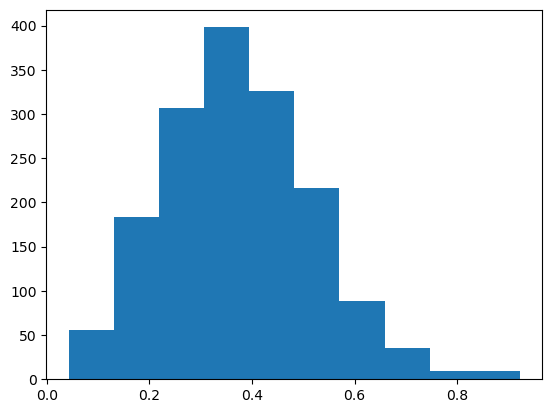

In [12]:
plt.hist(house['생활필수'])

In [9]:
def out(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    out_list = np.where((data>upper_bound)|(data<lower_bound))[0]
    return out_list


{'whiskers': [<matplotlib.lines.Line2D at 0x1bcb9b11ae0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcb9b0a1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcb9b11ff0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcb9b0ba00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcb9b626e0>],
 'means': []}

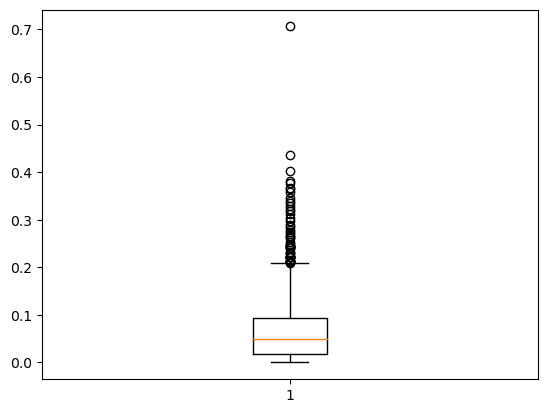

In [17]:
plt.boxplot(house['의류신발'])

In [14]:
house[house['의류신발']>0.7]

의류신발        음식     생활필수        여가  IT 및 교육   건강 및 미용
827  0.705981  0.145565  0.07972  0.033202      0.0  0.035532

In [77]:
house.drop(827,axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc1c3d4490>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc1c359960>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc1c3d41f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc1c2aad10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc1c3d48e0>],
 'means': []}

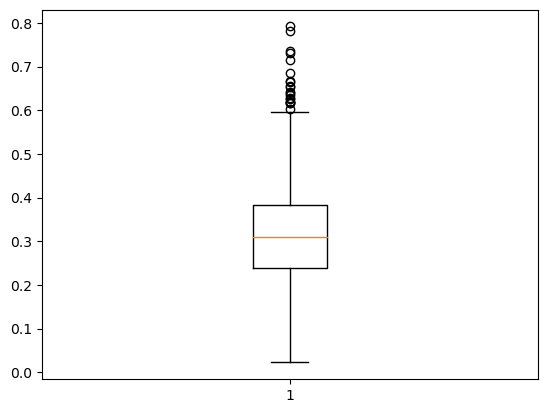

In [16]:
plt.boxplot(house['음식'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc1c42cac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc1c42d000>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc1c42c820>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc1c42d540>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc1c42d7e0>],
 'means': []}

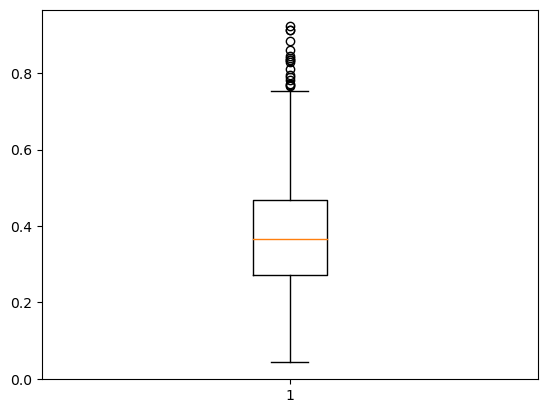

In [17]:
plt.boxplot(house['생활필수'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcc5666200>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcc5666740>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcc5665f60>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcc5666c80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcc5666f20>],
 'means': []}

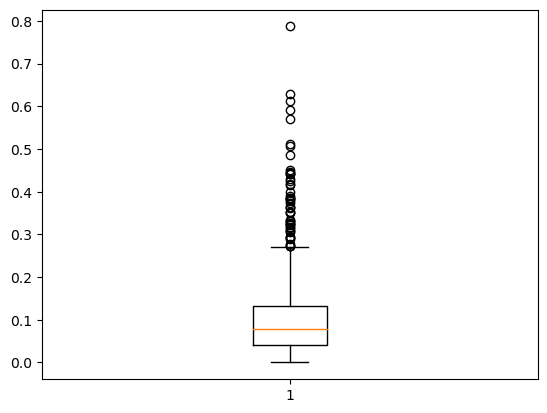

In [56]:
plt.boxplot(house['여가'])

In [18]:
house[house['여가']>0.7]

의류신발        음식      생활필수        여가  IT 및 교육  건강 및 미용
90  0.009444  0.064771  0.138774  0.787011      0.0      0.0

In [78]:
house.drop(90,axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcc56bea70>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcc56befb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcc56be7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcc56bf490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcc56bf730>],
 'means': []}

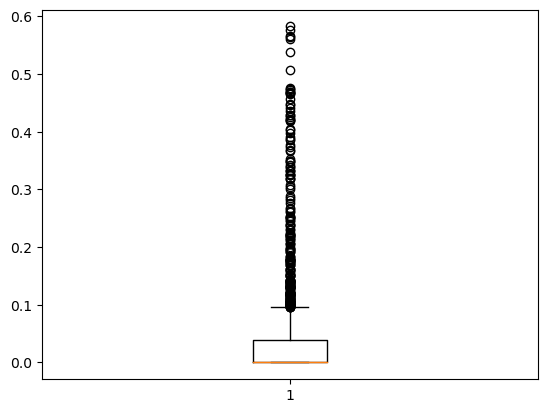

In [60]:
plt.boxplot(house['IT 및 교육'])

In [1]:
house[house['IT 및 교육']>0.5]

NameError: name 'house' is not defined

In [79]:
house.drop([376,446,773,921,969,1106],axis=0,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcc5722290>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcc57227d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcc5721ff0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcc5722d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcc5722fb0>],
 'means': []}

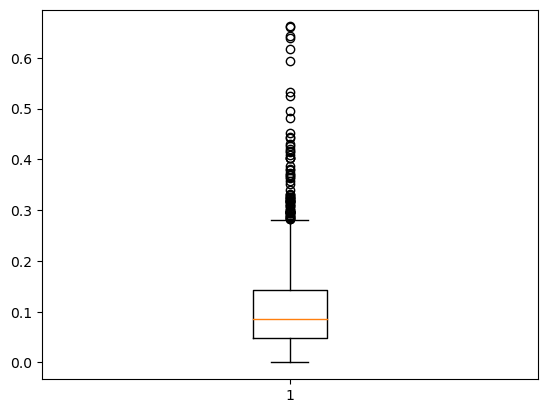

In [63]:
plt.boxplot(house['건강 및 미용'])

In [22]:
house[house['건강 및 미용']>0.57]

의류신발        음식      생활필수        여가   IT 및 교육   건강 및 미용
752   0.029319  0.115144  0.164571  0.044351  0.008403  0.638212
772   0.000000  0.235280  0.047607  0.055905  0.000000  0.661208
956   0.007560  0.246745  0.127023  0.015333  0.010168  0.593172
1140  0.092809  0.114506  0.145395  0.002622  0.002120  0.642548
1415  0.024844  0.148479  0.159056  0.049782  0.000000  0.617839
1431  0.011331  0.099000  0.161438  0.066432  0.000000  0.661798

In [80]:
house.drop([752,772,956,1140,1415,1431],axis=0,inplace=True)

In [78]:
house.drop(["cluster"],axis=1,inplace=True)

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [8]:
sc = StandardScaler()
scaled = sc.fit_transform(house)
pd.DataFrame(scaled)

0         1         2         3         4         5
0    -0.011526  0.900978 -0.923823  1.258054  0.213816 -0.988745
1     2.890270  0.217593 -1.326291 -0.553127 -0.463870  0.851110
2    -0.467526  0.555406 -0.143760 -0.375049  0.157432  0.030596
3     0.780050  0.249758 -1.110027 -0.725250 -0.278058  2.022321
4     0.042586  0.996253 -0.324125 -0.023549 -0.463870 -0.293206
...        ...       ...       ...       ...       ...       ...
1609 -0.646374 -0.992825  1.250426 -0.334994 -0.463870  0.459991
1610 -0.943510  0.693104  0.917727 -0.803012 -0.411225 -0.664222
1611 -0.225234 -0.213899  0.636777  0.131779 -0.463870 -0.280107
1612 -0.816247  2.258519 -0.481721 -0.316731 -0.463870 -0.811459
1613 -0.613382  0.326635  0.036433  0.096848 -0.040774 -0.082882

[1614 rows x 6 columns]

In [9]:
clusters=linkage(scaled,method='complete',metric='euclidean')

In [10]:
clusters.shape

(1613, 4)

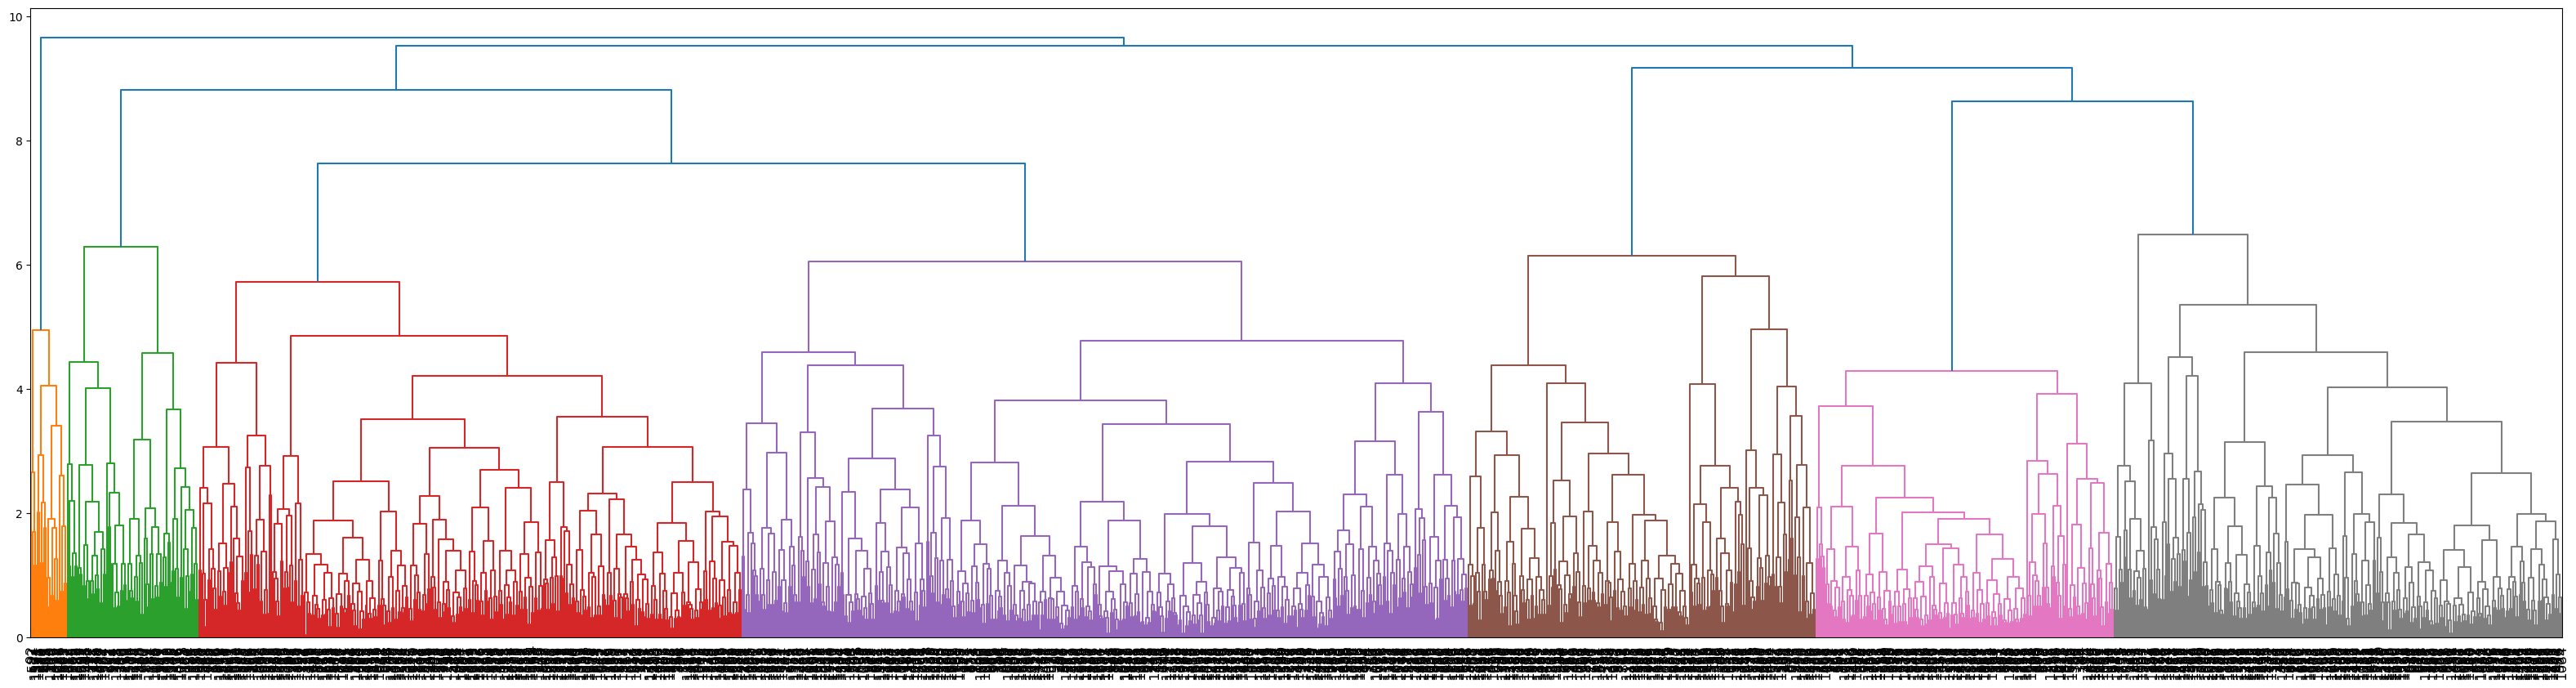

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
dendrogram(clusters,leaf_rotation=90,leaf_font_size=12,)
# leaf_rotation: 글자 각도
# leaf_font_size=20: 글자 사이즈
plt.show()


In [15]:
# scaled 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=7,random_state=2)
clusters2 = kmeans.fit(scaled)

In [81]:
#클러스터링 변수인 clusters 값을 원본 데이터인 'house' 내에 넣기
house['cluster'] = clusters2.labels_
house.head()

취업인원수  성별  연령  학력  수학구분   총소비지출액      의류신발        음식      생활필수        여가  \
0      1   1  27   6     1  1399222  0.064427  0.415963  0.244712  0.188750   
1      1   2  24   5     1   958911  0.245174  0.340638  0.187129  0.054152   
2      1   1  29   6     1  1468274  0.036024  0.377873  0.356318  0.067386   
3      0   2  28   5     1  1127203  0.113733  0.344184  0.218071  0.041361   
4      0   2  25   6     1   495179  0.067798  0.426464  0.330513  0.093508   

    IT 및 교육   건강 및 미용  cluster  
0  0.059858  0.026291        0  
1  0.000000  0.172908        2  
2  0.054878  0.107521        5  
3  0.016412  0.266240        1  
4  0.000000  0.081718        6

In [27]:
from sklearn.decomposition import PCA
X = scaled.copy()
# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca
# 결과는 array형태로 출력

array([[-0.77805546,  1.54866624],
       [-2.38880547, -1.08259528],
       [-0.08554144,  0.30931295],
       ...,
       [ 0.78872862,  0.19444   ],
       [-0.33362178,  2.15681436],
       [ 0.18969337,  0.49615856]])

In [28]:
# x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = house['cluster']
pca_df.head()

0         1  cluster
0 -0.778055  1.548666        0
1 -2.388805 -1.082595        2
2 -0.085541  0.309313        5
3 -1.870374 -1.027545        1
4 -0.392533  0.940485        6

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

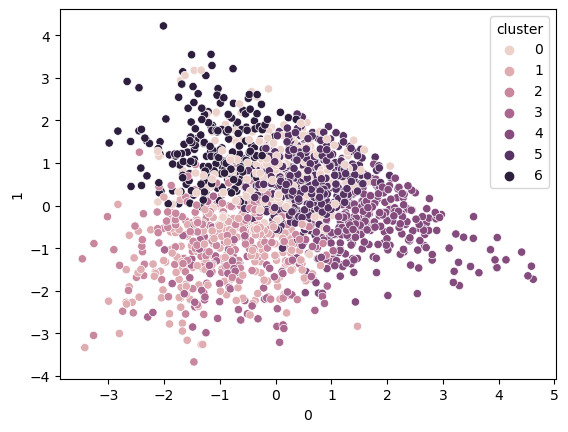

In [30]:
axs = plt.subplots()
axs = sns.scatterplot(data=pca_df, x=0,y=1,hue='cluster')

In [40]:
# x_pca를 보기 쉽게 데이터프레임으로 만들기
data_df['cluster'] = house['cluster']

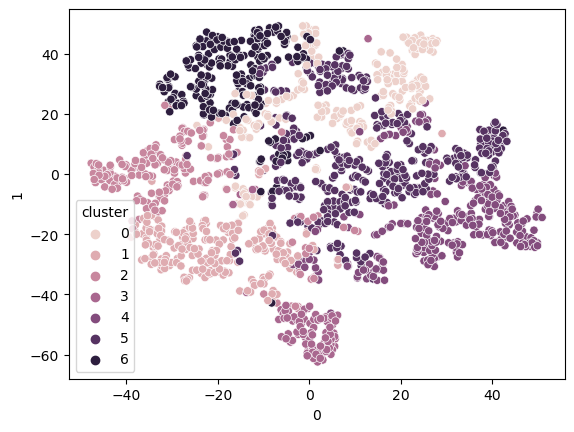

In [41]:

axs = plt.subplots()
axs = sns.scatterplot(data=data_df, x=0,y=1,hue='cluster')

In [89]:
clusters2.labels_

array([0, 2, 5, ..., 5, 6, 5])

In [90]:
from sklearn.metrics import silhouette_score
silhouette_score(house, clusters2.labels_, metric='euclidean')

0.8193757978452351

In [84]:
round(house.groupby('cluster').mean(),2)

취업인원수    성별     연령    학력  수학구분      총소비지출액  의류신발    음식  생활필수    여가  \
cluster                                                                       
0         0.81  1.41  25.96  5.43  1.45  1583730.53  0.05  0.28  0.34  0.23   
1         0.87  1.74  25.98  5.52  1.29  1729352.02  0.07  0.27  0.32  0.07   
2         0.89  1.64  25.71  5.68  1.36  1652867.91  0.19  0.30  0.30  0.08   
3         0.87  1.47  25.15  6.11  1.67  1876686.09  0.05  0.23  0.25  0.06   
4         0.78  1.53  25.39  5.46  1.44  1763550.43  0.04  0.22  0.59  0.06   
5         0.83  1.44  25.83  5.40  1.36  1366084.27  0.04  0.36  0.43  0.08   
6         0.81  1.38  25.58  5.57  1.48  1175458.76  0.05  0.49  0.24  0.10   

         IT 및 교육  건강 및 미용  
cluster                    
0           0.03     0.08  
1           0.03     0.25  
2           0.03     0.11  
3           0.34     0.08  
4           0.02     0.07  
5           0.02     0.07  
6           0.02     0.10

In [92]:
house['cluster'].value_counts()/1614

5    0.245973
4    0.171004
6    0.136927
1    0.133829
0    0.132590
2    0.119579
3    0.060099
Name: cluster, dtype: float64

In [13]:
pd.set_option('display.max_rows', None)

In [85]:
feature=house.groupby('cluster').mean()

In [ ]:
음식

In [87]:
round(feature,2)

취업인원수    성별     연령    학력  수학구분      총소비지출액  의류신발    음식  생활필수    여가  \
cluster                                                                       
0         0.81  1.41  25.96  5.43  1.45  1583730.53  0.05  0.28  0.34  0.23   
1         0.87  1.74  25.98  5.52  1.29  1729352.02  0.07  0.27  0.32  0.07   
2         0.89  1.64  25.71  5.68  1.36  1652867.91  0.19  0.30  0.30  0.08   
3         0.87  1.47  25.15  6.11  1.67  1876686.09  0.05  0.23  0.25  0.06   
4         0.78  1.53  25.39  5.46  1.44  1763550.43  0.04  0.22  0.59  0.06   
5         0.83  1.44  25.83  5.40  1.36  1366084.27  0.04  0.36  0.43  0.08   
6         0.81  1.38  25.58  5.57  1.48  1175458.76  0.05  0.49  0.24  0.10   

         IT 및 교육  건강 및 미용  
cluster                    
0           0.03     0.08  
1           0.03     0.25  
2           0.03     0.11  
3           0.34     0.08  
4           0.02     0.07  
5           0.02     0.07  
6           0.02     0.10

In [88]:
for i in feature.columns:
    feature[i+"특징"] = feature[i]>house[i].mean()

In [94]:
for i in house.columns:
    print(f"{i}의 전체평균은",house[i].mean())

취업인원수의 전체평균은 0.8302354399008675
성별의 전체평균은 1.509913258983891
연령의 전체평균은 25.70446096654275
학력의 전체평균은 5.529739776951673
수학구분의 전체평균은 1.4107806691449813
총소비지출액의 전체평균은 1550404.083023544
의류신발의 전체평균은 0.06514514394366144
음식의 전체평균은 0.3166549787413989
생활필수의 전체평균은 0.376886667724972
여가의 전체평균은 0.09525767980111459
IT 및 교육의 전체평균은 0.04097245760162027
건강 및 미용의 전체평균은 0.10508330061890042
cluster의 전체평균은 3.288723667905824


In [89]:
round(feature,2)

취업인원수    성별     연령    학력  수학구분      총소비지출액  의류신발    음식  생활필수    여가  \
cluster                                                                       
0         0.81  1.41  25.96  5.43  1.45  1583730.53  0.05  0.28  0.34  0.23   
1         0.87  1.74  25.98  5.52  1.29  1729352.02  0.07  0.27  0.32  0.07   
2         0.89  1.64  25.71  5.68  1.36  1652867.91  0.19  0.30  0.30  0.08   
3         0.87  1.47  25.15  6.11  1.67  1876686.09  0.05  0.23  0.25  0.06   
4         0.78  1.53  25.39  5.46  1.44  1763550.43  0.04  0.22  0.59  0.06   
5         0.83  1.44  25.83  5.40  1.36  1366084.27  0.04  0.36  0.43  0.08   
6         0.81  1.38  25.58  5.57  1.48  1175458.76  0.05  0.49  0.24  0.10   

         IT 및 교육  건강 및 미용  취업인원수특징   성별특징   연령특징   학력특징  수학구분특징  총소비지출액특징  \
cluster                                                                     
0           0.03     0.08    False  False   True  False    True      True   
1           0.03     0.25     True   True   True  False   False      True   
2           0.03     0.11     True   True   True   True   False      True   
3           0.34     0.08     True  False  False   True    True      True   
4           0.02     0.07    False   True  False  False    True      True   
5           0.02     0.07    False  False   True  False   False     False   
6           0.02     0.10    False  False  False   True    True     False   

         의류신발특징   음식특징  생활필수특징   여가특징  IT 및 교육특징  건강 및 미용특징  
cluster                                                      
0         False  False   False   True      False      False  
1          True  False   False  False      False       True  
2          True  False   False  False      False       True  
3         False  False   False  False       True      False  
4         False  False    True  False      False      False  
5         False   True    True  False      False      False  
6         False   True   False   True      False      False

### 어쩔 수 없다 이젠 t-SNE와 DBSCAN으로 간다

In [ ]:
def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(x_train[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()

In [37]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 600)
transformed = model.fit_transform(scaled)

In [38]:
transformed

array([[ -3.2598872,  45.031685 ],
       [-38.35853  ,   2.0432656],
       [  7.0316725,   1.1191036],
       ...,
       [ 21.325567 ,  10.991346 ],
       [-16.407494 ,  43.95862  ],
       [  3.944292 ,  27.605486 ]], dtype=float32)

In [39]:
data_df = pd.DataFrame(transformed)

In [47]:
data_df.drop('cluster',axis=1,inplace=True)

<Axes: xlabel='0', ylabel='1'>

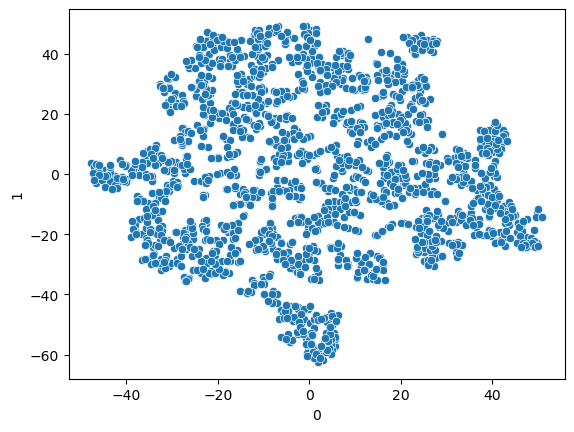

In [42]:
sns.scatterplot(x=data_df[0],y=data_df[1])

In [43]:
sc = StandardScaler()
scaled = sc.fit_transform(data_df)
dd=pd.DataFrame(scaled)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

<Axes: xlabel='0', ylabel='1'>

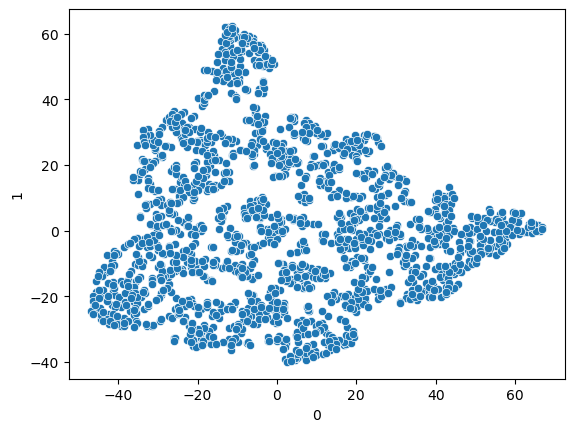

In [144]:
sns.scatterplot(x=data_df[0],y=data_df[1])

<Axes: xlabel='0', ylabel='1'>

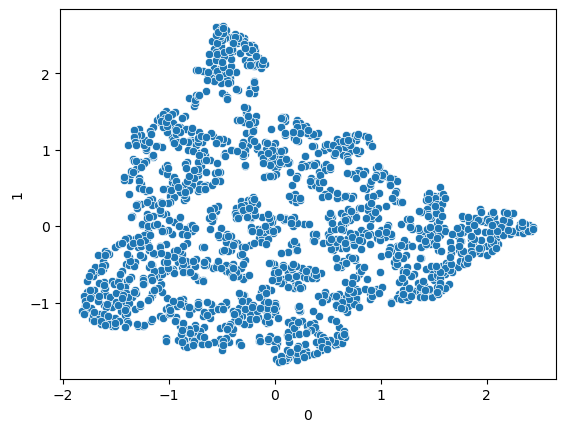

In [145]:
sns.scatterplot(x=dd[0],y=dd[1])

In [44]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN

In [162]:
for eps in np.arange(0.1, 1, 0.025):
    for min in np.arange(25,35,1):
        print(f"eps: {eps:.2f} // min_samples: {min}",end='//')
        dbscan = DBSCAN(eps=eps, min_samples=min)
        dbscan.fit(dd)

        if max(set(dbscan.labels_))==-1: # 모두 Noise로 배정받을 경우
            print("모두 Noise이므로 eps를 키워야함")
        elif max(set(dbscan.labels_))== 0 : # 한개의 군집만 존재하는 경우
            print("군집이 오직 한개이므로 eps를 줄여야함")
        else:
            score = silhouette_score(dd[dbscan.labels_!=-1], dbscan.labels_[dbscan.labels_!=-1])
            print(f"silhouette idx : {score:.3f}\n")

eps: 0.10 // min_samples: 25//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 26//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 27//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 28//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 29//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 30//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 31//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 32//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 33//모두 Noise이므로 eps를 키워야함
eps: 0.10 // min_samples: 34//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 25//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 26//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 27//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 28//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 29//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 30//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 31//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 32//모두 Noise이므로 eps를 키워야함
eps: 0.12 // min_samples: 33//모두 Noise이므로 eps를 키워야함
eps: 0.12 //

eps: 0.50 // min_samples: 27//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.50 // min_samples: 28//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.50 // min_samples: 29//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.50 // min_samples: 30//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.50 // min_samples: 31//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.50 // min_samples: 32//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.50 // min_samples: 33//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.50 // min_samples: 34//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 25//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 26//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 27//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 28//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 29//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 30//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 31//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 32//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 33//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.52 // min_samples: 34//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.55 // min_samples: 25//군집이 오직 한개이므로 eps

eps: 0.87 // min_samples: 33//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.87 // min_samples: 34//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 25//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 26//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 27//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 28//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 29//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 30//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 31//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 32//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 33//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.90 // min_samples: 34//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.92 // min_samples: 25//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.92 // min_samples: 26//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.92 // min_samples: 27//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.92 // min_samples: 28//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.92 // min_samples: 29//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.92 // min_samples: 30//군집이 오직 한개이므로 eps를 줄여야함
eps: 0.92 // min_samples: 31//군집이 오직 한개이므로 eps

In [88]:
sc = StandardScaler()
scaled = sc.fit_transform(data_df)
dd1=pd.DataFrame(scaled)

In [54]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.17, min_samples=29)
predict = model.fit(data_df)
y_pred = predict.labels_

In [46]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.10, min_samples=6)
predict = model.fit(data_df)
y_pred = predict.labels_

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [55]:
dataset = pd.DataFrame({'Column1':transformed[:,0], 'Column2':transformed[:,1]})
dataset['cluster']=pd.Series(predict.labels_)

In [56]:
predict.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [57]:
dataset

Column1    Column2  cluster
0     -3.259887  45.031685       -1
1    -38.358528   2.043266       -1
2      7.031672   1.119104       -1
3    -27.651331 -21.097719       -1
4     -6.966179  10.982732       -1
5     -0.224227 -58.439331       -1
6    -32.754707  -7.517109       -1
7     27.027512  40.515720       -1
8    -25.299351  -2.436845       -1
9     -0.281399 -17.378584       -1
10   -16.544971 -26.637730       -1
11     0.014341 -26.147884       -1
12     0.717428 -23.773125       -1
13     6.531336   5.684320       -1
14    -1.488689   5.931466       -1
15    22.267101  23.341841       -1
16   -22.481682 -28.005743       -1
17    -8.606817 -33.299671       -1
18    -0.340045 -44.690987       -1
19    -7.868889 -24.994705       -1
20    20.414818  -3.698001       -1
21   -10.085250 -34.346161       -1
22   -21.556372 -32.122131       -1
23    39.765846  13.582885       -1
24    33.212139  -3.825037       -1
25    24.189514  30.449167       -1
26    41.763088   9.272971       -1
27    -2.383236 -53.290234       -1
28    41.824585 -21.779428       -1
29    40.355461  -0.560844       -1
30    36.897873 -16.073729       -1
31    -3.414952 -31.487093       -1
32   -17.564846 -32.818138       -1
33   -35.353867 -14.655120       -1
34    49.804581 -22.857708       -1
35    25.198700   6.943572       -1
36   -23.923296 -31.983585       -1
37   -29.234016   3.136603       -1
38    45.280949 -19.314085       -1
39    16.269226  -5.161232       -1
40     4.011426   8.212511       -1
41     6.714577 -26.791992       -1
42   -11.211691  38.703777       -1
43    14.540661  10.368874       -1
44    47.965740 -21.856470       -1
45   -22.771570 -21.894293       -1
46   -35.657692 -18.719006       -1
47    28.406805 -17.581121       -1
48   -16.871729  23.426645       -1
49    31.523064   5.158118       -1
50    10.079594 -12.938378       -1
51   -21.093582  19.452787       -1
52    33.743454   6.933130       -1
53    -4.273013 -54.628262       -1
54    24.983732 -26.051538       -1
55    -6.815680 -26.151979       -1
56   -17.317009  39.493294       -1
57    23.650688  31.337627       -1
58   -29.058355   3.964020       -1
59    22.329409  28.418331       -1
60    17.689434  -2.723265       -1
61     6.176616 -46.912006       -1
62   -33.144951   3.605633       -1
63    19.227386  -0.589919       -1
64    15.339416 -27.710018       -1
65    -2.507308  -7.662947       -1
66    -1.069824 -28.915554       -1
67    25.430742   3.782721       -1
68     5.037982 -50.187553       -1
69    49.741951 -12.912652       -1
70    42.473061 -10.569840       -1
71   -41.734974  -2.803719       -1
72    21.801987  -5.871801       -1
73   -33.449032 -14.429317       -1
74   -17.471581  21.883909       -1
75   -26.192591 -34.421032       -1
76    22.995493  -6.748627       -1
77   -11.741443  34.269131       -1
78    46.795959 -20.402662       -1
79    44.896286 -13.638036       -1
80    47.372856 -20.879154       -1
81    46.541801 -18.945169       -1
82     5.538191 -57.267353       -1
83    27.091696 -29.994612       -1
84   -10.099918  33.803757       -1
85     7.152726  -6.756721       -1
86     1.783846 -59.295258       -1
87   -32.375137 -31.816732       -1
88    12.544328 -34.817245       -1
89    25.043421 -28.907221       -1
90   -24.546885  16.123734       -1
91   -25.515860 -31.980730       -1
92   -47.649242   3.579572       -1
93   -31.710428  -7.061148       -1
94    23.321766 -26.472153       -1
95    39.261417 -18.613598       -1
96   -18.165598  11.515667       -1
97    -8.705125  48.534977       -1
98     2.651223  -3.475507       -1
99    23.688868 -16.258781       -1
100   23.403124 -17.697119       -1
101   42.998993 -20.909578       -1
102   38.457443  -3.121128       -1
103   26.840008 -27.357763       -1
104   34.572605  -2.871403       -1
105   46.022297 -20.487226       -1
106   -2.742724 -32.593777       -1
107  -39.836365  -1.722169       -1
108    4.029534  -5.792149       -1
109    3.199723 -56.240139       -1
110   11.919

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


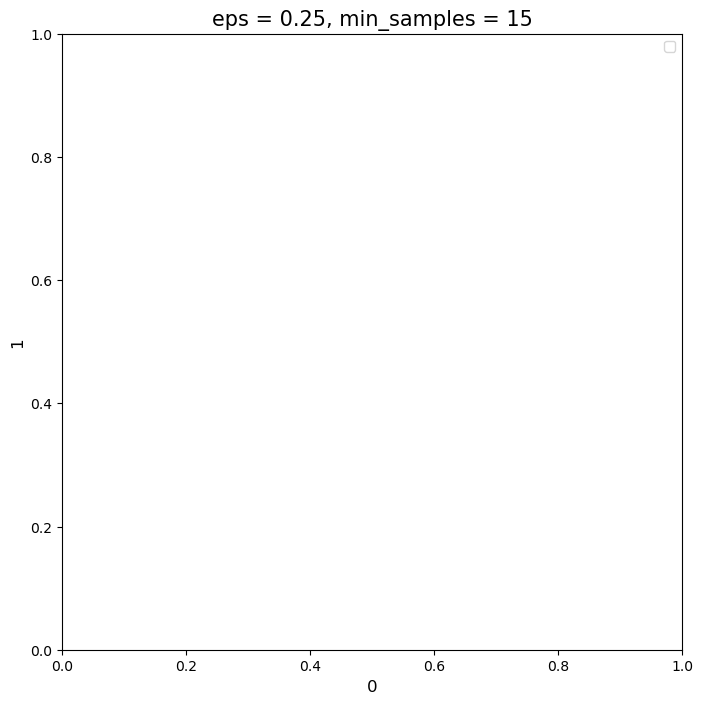

In [58]:
plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(dataset['cluster'].max() + 1):
    plt.scatter(dataset.loc[dataset['cluster'] == i, 'Column1'],dataset.loc[dataset['cluster'] == i, 'Column2'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.25, min_samples = 15', size = 15)
plt.xlabel('0', size = 12)
plt.ylabel('1', size = 12)
plt.show()

In [180]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_avg = silhouette_score(dataset[dataset.cluster!=-1], dataset.cluster[dataset.cluster!=-1])
print(silhouette_avg)
#=>0.5090166526563076

0.7372130267744563


In [252]:
after = dataset[dataset.cluster!=-1]

In [ ]:
af


In [175]:
sc = StandardScaler()
scaled = sc.fit_transform(house)
dd=pd.DataFrame(scaled)

<Axes: xlabel='0', ylabel='1'>

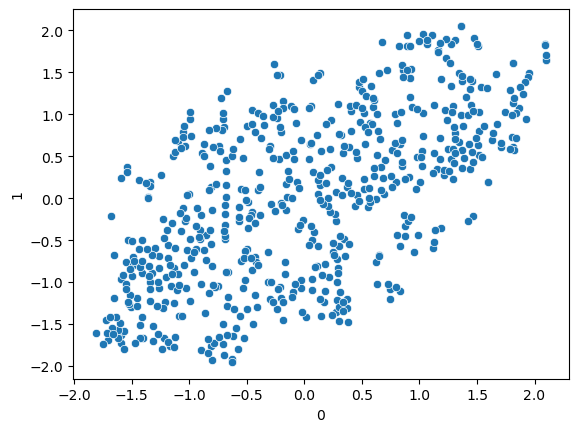

In [46]:
# sns.scatterplot(x=sca[0],y=dd[1])

In [210]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.6, min_samples=5)
predict = model.fit(scaled)
y_pred = predict.labels_

In [211]:
dataset = pd.DataFrame({'Column1':transformed[:,0], 'Column2':transformed[:,1]})
dataset['cluster']=pd.Series(predict.labels_)


In [212]:
predict.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1, -1,  0, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1, -1,
        0,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1,  0,
       -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0,
       -1, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,
       -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0,  0,
       -1, -1, -1, -1,  0

In [209]:
dataset

Column1    Column2  cluster
0     4.692525  15.455057        0
1    20.260662  13.627978        0
2    19.491467  26.063349        0
3   -13.988676  -6.735256        0
4     3.816361  12.924108        0
..         ...        ...      ...
583  10.928702 -14.249868        0
584  19.296829   5.711307        0
585   4.928739  -6.346825        0
586   5.231174   0.457778        0
587  14.496270   1.470430        0

[588 rows x 3 columns]

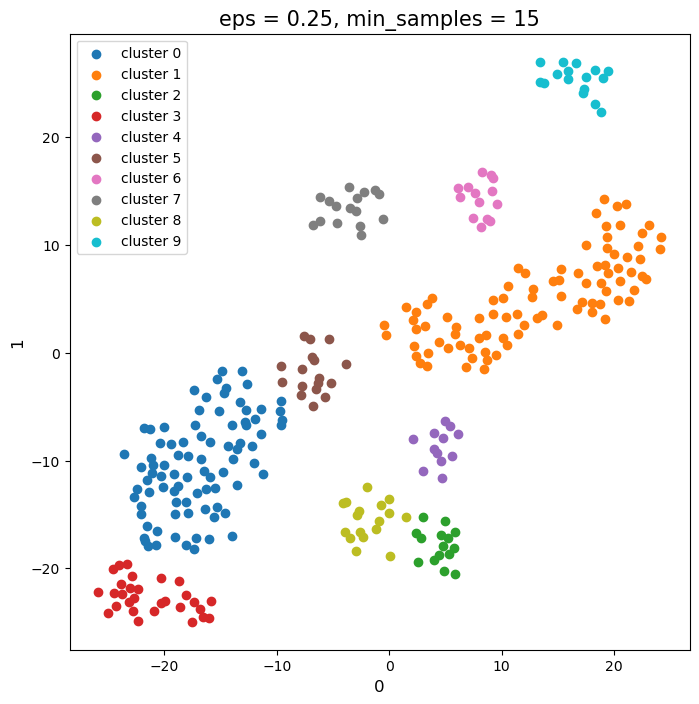

In [174]:
plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(dataset['cluster'].max() + 1):
    plt.scatter(dataset.loc[dataset['cluster'] == i, 'Column1'],dataset.loc[dataset['cluster'] == i, 'Column2'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 0.25, min_samples = 15', size = 15)
plt.xlabel('0', size = 12)
plt.ylabel('1', size = 12)
plt.show()

In [40]:
house.to_csv('house_ratio_control.csv')